In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.models import model_from_json
from sklearn.cross_validation import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

Using TensorFlow backend.
/Users/giorgoschantzialexiou/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
amazon_csv = '/Users/giorgoschantzialexiou/Repositories/stock_prediction_web_app/data/historical_stock_price_data/hist_NVDA.csv'

prices_dataset =  pd.read_csv(amazon_csv, header=0)
prices_dataset.head()

,stock_name,date,open,high,low,close,volume
0,NVDA,2016-09-16,63,63,62,63,22561149
1,NVDA,2016-09-19,64,65,63,64,10428207
2,NVDA,2016-09-20,64,64,63,63,8277832
3,NVDA,2016-09-21,63,65,63,65,8405337
4,NVDA,2016-09-22,65,65,65,65,7718287


In [7]:
amazon = prices_dataset[prices_dataset['stock_name']=='NVDA']
#amazon = prices_dataset
amazon_stock_prices = amazon.close.values.astype('float32')
amazon_stock_prices = amazon_stock_prices.reshape(amazon_stock_prices.shape[0], 1)
amazon_stock_prices.shape

(365, 1)

In [8]:
amazon_stock_prices.shape[0]


365

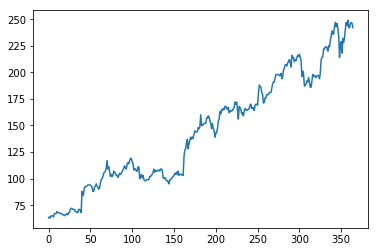

In [9]:
plt.plot(amazon_stock_prices)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
amazon_stock_prices = scaler.fit_transform(amazon_stock_prices)

In [10]:
train_size = int(len(amazon_stock_prices) * 0.80)
test_size = len(amazon_stock_prices) - train_size
train, test = amazon_stock_prices[0:train_size,:], amazon_stock_prices[train_size:len(amazon_stock_prices),:]
print(len(train), len(test))

(292, 73)


In [11]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [12]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [13]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

/Users/giorgoschantzialexiou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/Users/giorgoschantzialexiou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, return_sequences=True, input_shape=(None, 1))`


('compilation time : ', 0.045033931732177734)


/Users/giorgoschantzialexiou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [16]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

Train on 275 samples, validate on 15 samples
Epoch 1/10
275/275 [==============================] - 0s 186us/step - loss: 0.0222 - val_loss: 0.0948
Epoch 2/10
275/275 [==============================] - 0s 214us/step - loss: 0.0212 - val_loss: 0.0846
Epoch 3/10
275/275 [==============================] - 0s 226us/step - loss: 0.0208 - val_loss: 0.0741
Epoch 4/10
275/275 [==============================] - 0s 220us/step - loss: 0.0191 - val_loss: 0.0746
Epoch 5/10
275/275 [==============================] - 0s 208us/step - loss: 0.0186 - val_loss: 0.0721
Epoch 6/10
275/275 [==============================] - 0s 236us/step - loss: 0.0171 - val_loss: 0.0666
Epoch 7/10
275/275 [==============================] - 0s 202us/step - loss: 0.0159 - val_loss: 0.0616
Epoch 8/10
275/275 [==============================] - 0s 236us/step - loss: 0.0148 - val_loss: 0.0557
Epoch 9/10
275/275 [==============================] - 0s 238us/step - loss: 0.0142 - val_loss: 0.0460
Epoch 10/10
275/275 [================

In [275]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()

[[ 0.41546598]]
[[ 0.77960938]]
[[ 1.20167851]]
[[ 1.72942364]]
[[ 2.40209246]]
[[ 140.27667236]
 [ 208.00733948]
 [ 286.51220703]
 [ 384.67279053]
 [ 509.78918457]]


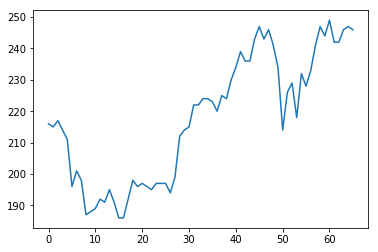

In [276]:
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)

In [277]:
scaler.inverse_transform(np.array(predictions).reshape(-1,1))

array([[ 140.27667236],
       [ 208.00733948],
       [ 286.51220703],
       [ 384.67279053],
       [ 509.78918457]], dtype=float32)

In [278]:
aa = np.array([[0.45]])

In [279]:
 predict_sequences_multiple(model, aa, 5)

[[ 0.3266986]]
[[ 0.63428557]]
[[ 1.00138128]]
[[ 1.4647907]]
[[ 2.06004786]]


[0.3266986, 0.63428557, 1.0013813, 1.4647907, 2.0600479]

In [280]:
stock_name = amazon_csv.split('/')[-1].split('.')[0].split('_')[1]
create_dir = 'trained_models/' + stock_name
create_dir
if not os.path.exists(create_dir):
    os.makedirs(create_dir)
else:
    print 'Directory exists'

In [281]:
os.path.join(create_dir,stock_name.lower()) +'.csv'

'trained_models/NVDA/nvda.csv'

In [282]:
file_dir = os.path.join(create_dir,stock_name.lower())
## seriliaze model
model_json = model.to_json()
with open(file_dir +'.json','w') as json_file:
    json_file.write(model_json)

# seriliaze weights
model.save_weights(file_dir + '.h5')
print 'Saved model to disk'

Saved model to disk


In [264]:
## deserialize and open the model
json_file = open('amazon_model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("amazon_model.h5")
print("Loaded model from disk")

IOError: [Errno 2] No such file or directory: 'amazon_model.json'

In [ ]:
 predict_sequences_multiple(loaded_model, aa, 5)

In [ ]:
scaler.inverse_transform([[0.26980042]])